<h1>SI 670 Kaggle Competition 4</h1>

Team GSIs

In [90]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import tensorflow as tf
tf.get_logger().setLevel('INFO')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import tensorflow as tf
import tensorflow_datasets as tfds
from keras.preprocessing.text import Tokenizer
from keras import Sequential
from keras import Model, Sequential, layers
from keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras import Input 

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h2>Load datasets</h2>

In [4]:
len(list(os.listdir("../data/images_train/bathroom"))), len(list(os.listdir("../data/images_train/kitchen")))

FileNotFoundError: [Errno 2] No such file or directory: '../data/images_train/bathroom'

In [91]:
data = tf.keras.utils.image_dataset_from_directory("../images_train", 
                                                   image_size = (256, 256), 
                                                   class_names = ['bathroom', 'kitchen'], 
                                                   shuffle = True,
                                                   batch_size = 32)

# run

Found 616 files belonging to 2 classes.


In [92]:
X, y = zip(*data)

X = np.concatenate(X)
y = np.concatenate(y)
# run

In [93]:
len(X), len(y)
# run

(616, 616)

In [25]:
img_width, img_height = 256, 256
batch_size = 8

In [26]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, shear_range=0.2, zoom_range=0.2, validation_split=0.2)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory("../images_train", target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 616 images belonging to 2 classes.


<h2>Preprocess Images</h2>

In [94]:
#flip labels so bathroom is 1
y = np.where(y == 1, 0, 1)
# run

In [55]:
X = np.apply_along_axis(lambda s: s / 255.0, axis = 1, arr = X)

<h2>Split</h2>

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
# run

In [30]:
train_datagen.fit(X_train)
# X_val = train_datagen.fit(X_val)
test_datagen.fit(X_test)

In [175]:
test_datagen.fit(X_test)

<h2>Train Model</h2>

In [ ]:
def skip_block(x):
    x_skip = x.copy()

    x = tf.keras.layers.Conv2D(64, (3, 3), strides = (2, 2), kernel_regularizer = l2(0.001))(x)
    x = tf.keras.layers.MaxPooling2D()

In [39]:
def random_invert_img(x, p=0.5):
  if  tf.random.uniform([]) < p:
    x = (255-x)
  else:
    x
  return x
def random_invert(factor=0.5):
  return layers.Lambda(lambda x: random_invert_img(x, factor))

random_invertx = random_invert()

In [96]:
IMG_SIZE = 256

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  # random_invert(),
])

# run

In [75]:
model = Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(62, activation='sigmoid'),
    layers.Dense(1),
    # input
    # tf.keras.layers.Conv2D(128, (3, 3), input_shape = (256, 256, 3)), 
    # # tf.keras.layers.BatchNormalization(axis = -1, epsilon = 2e-5),  
    # # tf.keras.layers.BatchNormalization(axis = -1),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 

    
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # # tf.keras.layers.BatchNormalization(axis = -1, epsilon = 2e-5, input_shape = (256, 256, 3)), 
    # # tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), activation = 'relu'), 
    # tf.keras.layers.BatchNormalization(axis = -1, epsilon = 2e-5, input_shape = (256, 256, 3)), 
    # tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'), 

    
    # # tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', input_shape = (256, 256, 3)), 
    # # tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'), 
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'), 
    # # tf.keras.layers.Dropout(0.1),
    # # tf.keras.layers.Conv2D(86, (3, 3), activation = 'relu'),
    # # tf.keras.layers.MaxPooling2D((3, 3)),
    # tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    # # tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    # tf.keras.layers.Dropout(0.01),
    # tf.keras.layers.MaxPooling2D((2, 2)),
    # tf.keras.layers.Flatten(), 
    # tf.keras.layers.Dense(50), 
    # tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [97]:
model = Sequential([
    # input
    resize_and_rescale,
    data_augmentation,
    # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    # tf.keras.layers.MaxPooling2D((3, 3)),
    # tf.keras.layers.BatchNormalization(axis = -1, epsilon = 2e-5, input_shape = (256, 256, 3)),
    # tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D((3, 3)),   
    
    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (256, 256, 3)), 
    tf.keras.layers.BatchNormalization(axis = -1, epsilon = 2e-5),  
    
    # tf.keras.layers.Conv2D(64, (3, 3), kernel_regularizer = l2(0.0001), activation = 'relu'), 

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 

    
    tf.keras.layers.MaxPooling2D((3, 3)),
    # tf.keras.layers.BatchNormalization(axis = -1, epsilon = 2e-5, input_shape = (256, 256, 3)), 
    # tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), activation = 'relu'), 
    # tf.keras.layers.BatchNormalization(axis = -1, epsilon = 2e-5, input_shape = (256, 256, 3)), 
    # tf.keras.layers.Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), activation = 'relu'), 

    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', input_shape = (256, 256, 3)), 
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'), 
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'), 
    # tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu'), 
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(64), 
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# run

In [98]:
loss = BinaryCrossentropy()
model.compile(optimizer = 'adam', loss = loss, metrics = ['accuracy'])
# keras adam optimizer
# tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)


# run

In [25]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience = 3, restore_best_weights = True)
model.fit(
    train_generator,
    epochs=10,
    workers=-1)
    # validation_data=validation_generator,
    # validation_steps=800)

Epoch 1/10
11/77 [===>..........................] - ETA: 58s - loss: 0.6965 - accuracy: 0.4318

KeyboardInterrupt: 

In [69]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 
import tensorflow as tf

In [100]:
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 3, restore_best_weights = True)
# didnt do validation, just train and test
# model_history = model.fit(train_datagen.flow(X_train, y_train, batch_size=32,
#          subset='training'), epochs = 15, 
#                         #   callbacks = [early_stopping], 
#                           validation_data = train_datagen.flow(X_train, y_train, batch_size=8, subset="validation") )

model_history = model.fit(X_train, y_train, epochs = 15, batch_size = 8, 
                        #   callbacks = [early_stopping], 

                          validation_data = (X_val, y_val))


# run

Epoch 1/15
 1/50 [..............................] - ETA: 7s - loss: 0.2451 - accuracy: 0.8750

2023-11-19 17:57:47.243136: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.243915: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.390663: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.391555: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/50 [>.............................] - ETA: 5s - loss: 0.2035 - accuracy: 0.9167

2023-11-19 17:57:47.507048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.507379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.641890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.642456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/50 [==>...........................] - ETA: 5s - loss: 0.3354 - accuracy: 0.8750

2023-11-19 17:57:47.771563: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.772188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.886138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:47.887216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/50 [===>..........................] - ETA: 5s - loss: 0.3420 - accuracy: 0.8571

2023-11-19 17:57:48.000165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.000897: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.113914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.114754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/50 [====>.........................] - ETA: 4s - loss: 0.3224 - accuracy: 0.8611

2023-11-19 17:57:48.237766: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.238506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.351856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.352960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/50 [=====>........................] - ETA: 4s - loss: 0.3451 - accuracy: 0.8523

2023-11-19 17:57:48.465605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.465819: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.576159: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.576636: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/50 [======>.......................] - ETA: 4s - loss: 0.3231 - accuracy: 0.8654

2023-11-19 17:57:48.714941: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.715293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.826813: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.827146: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/50 [========>.....................] - ETA: 4s - loss: 0.2974 - accuracy: 0.8750

2023-11-19 17:57:48.942402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:48.943516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.056987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.057437: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/50 [=========>....................] - ETA: 3s - loss: 0.3026 - accuracy: 0.8676

2023-11-19 17:57:49.169651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.170377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.292540: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.293361: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/50 [==========>...................] - ETA: 3s - loss: 0.3011 - accuracy: 0.8684

2023-11-19 17:57:49.402923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.403653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.515222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.515570: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/50 [===========>..................] - ETA: 3s - loss: 0.3273 - accuracy: 0.8690

2023-11-19 17:57:49.627654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.627646: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.739529: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.740100: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/50 [============>.................] - ETA: 3s - loss: 0.3493 - accuracy: 0.8478

2023-11-19 17:57:49.852382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.853053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.967805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:49.968488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/50 [==============>...............] - ETA: 2s - loss: 0.3513 - accuracy: 0.8450

2023-11-19 17:57:50.082269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.082438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.206028: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.206716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/50 [===============>..............] - ETA: 2s - loss: 0.3449 - accuracy: 0.8519

2023-11-19 17:57:50.319086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.320048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.430283: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.431038: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/50 [================>.............] - ETA: 2s - loss: 0.3436 - accuracy: 0.8491

2023-11-19 17:57:50.542594: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.543225: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.654164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.654600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/50 [=================>............] - ETA: 2s - loss: 0.3306 - accuracy: 0.8548

2023-11-19 17:57:50.765956: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.766626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.905049: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:50.905462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/50 [==================>...........] - ETA: 1s - loss: 0.3360 - accuracy: 0.8523

2023-11-19 17:57:51.018733: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.019505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.134465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.135480: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/50 [====================>.........] - ETA: 1s - loss: 0.3379 - accuracy: 0.8571

2023-11-19 17:57:51.248809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.248851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.361166: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.361744: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/50 [=====================>........] - ETA: 1s - loss: 0.3281 - accuracy: 0.8649

2023-11-19 17:57:51.474865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.475298: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.588082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.588379: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/50 [======================>.......] - ETA: 1s - loss: 0.3205 - accuracy: 0.8686

2023-11-19 17:57:51.700754: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.701220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.814791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.815420: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/50 [=======================>......] - ETA: 1s - loss: 0.3259 - accuracy: 0.8689

2023-11-19 17:57:51.929245: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:51.929567: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.040403: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.040550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/50 [========================>.....] - ETA: 0s - loss: 0.3192 - accuracy: 0.8721

2023-11-19 17:57:52.152485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.152902: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.263306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.263719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/50 [==========================>...] - ETA: 0s - loss: 0.3230 - accuracy: 0.8722

2023-11-19 17:57:52.375382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.376282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.490450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.491042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/50 [===========================>..] - ETA: 0s - loss: 0.3198 - accuracy: 0.8723

2023-11-19 17:57:52.612290: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.613472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.775400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.776660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/50 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8750

2023-11-19 17:57:52.976600: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:52.983082: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.137377: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.138447: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/50 [==============================] - 6s 127ms/step - loss: 0.3100 - accuracy: 0.8753 - val_loss: 0.2391 - val_accuracy: 0.9091
Epoch 2/15
 1/50 [..............................] - ETA: 5s - loss: 0.0514 - accuracy: 1.0000

2023-11-19 17:57:53.637356: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.637881: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.754141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.754519: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/50 [>.............................] - ETA: 5s - loss: 0.0612 - accuracy: 1.0000

2023-11-19 17:57:53.866791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.867138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.991567: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:53.992433: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/50 [==>...........................] - ETA: 5s - loss: 0.1829 - accuracy: 0.9750

2023-11-19 17:57:54.105997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.106851: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.216996: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.217434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/50 [===>..........................] - ETA: 5s - loss: 0.1524 - accuracy: 0.9821

2023-11-19 17:57:54.334772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.335271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.452943: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.453869: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/50 [====>.........................] - ETA: 4s - loss: 0.1471 - accuracy: 0.9861

2023-11-19 17:57:54.569872: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.571078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.686880: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.687987: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/50 [=====>........................] - ETA: 4s - loss: 0.1506 - accuracy: 0.9659

2023-11-19 17:57:54.800032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.800623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.912605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:54.913215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/50 [======>.......................] - ETA: 4s - loss: 0.1559 - accuracy: 0.9519

2023-11-19 17:57:55.027319: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.028210: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.142873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.143278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/50 [========>.....................] - ETA: 4s - loss: 0.1644 - accuracy: 0.9417

2023-11-19 17:57:55.253953: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.254477: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.367515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.367642: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/50 [=========>....................] - ETA: 3s - loss: 0.2061 - accuracy: 0.9338

2023-11-19 17:57:55.478056: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.478482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.590330: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.590812: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/50 [==========>...................] - ETA: 3s - loss: 0.2253 - accuracy: 0.9145

2023-11-19 17:57:55.706916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.707436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.818549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.819018: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/50 [===========>..................] - ETA: 3s - loss: 0.2563 - accuracy: 0.9048

2023-11-19 17:57:55.930854: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:55.931814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.042567: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.043087: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/50 [============>.................] - ETA: 3s - loss: 0.2511 - accuracy: 0.9022

2023-11-19 17:57:56.157693: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.158865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.273493: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.273862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/50 [==============>...............] - ETA: 2s - loss: 0.3017 - accuracy: 0.8750

2023-11-19 17:57:56.385667: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.385917: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.506044: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.507116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/50 [===============>..............] - ETA: 2s - loss: 0.3087 - accuracy: 0.8704

2023-11-19 17:57:56.622075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.622783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.733735: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.734475: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/50 [================>.............] - ETA: 2s - loss: 0.3204 - accuracy: 0.8707

2023-11-19 17:57:56.845826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.846031: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.959358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:56.959859: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/50 [=================>............] - ETA: 2s - loss: 0.3229 - accuracy: 0.8710

2023-11-19 17:57:57.075725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.076271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.189935: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.190697: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/50 [==================>...........] - ETA: 1s - loss: 0.3210 - accuracy: 0.8750

2023-11-19 17:57:57.302288: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.303203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.413123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.413507: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/50 [====================>.........] - ETA: 1s - loss: 0.3265 - accuracy: 0.8714

2023-11-19 17:57:57.524965: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.525595: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.659346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.660212: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/50 [=====================>........] - ETA: 1s - loss: 0.3199 - accuracy: 0.8784

2023-11-19 17:57:57.774373: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.774472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.888105: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:57.889053: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/50 [======================>.......] - ETA: 1s - loss: 0.3232 - accuracy: 0.8718

2023-11-19 17:57:57.999673: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.000518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.112382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.112732: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/50 [=======================>......] - ETA: 1s - loss: 0.3198 - accuracy: 0.8720

2023-11-19 17:57:58.223932: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.224386: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.335023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.335824: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/50 [========================>.....] - ETA: 0s - loss: 0.3239 - accuracy: 0.8663

2023-11-19 17:57:58.448244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.448432: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.558631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.559093: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/50 [==========================>...] - ETA: 0s - loss: 0.3262 - accuracy: 0.8639

2023-11-19 17:57:58.670726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.671427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.783266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.783847: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/50 [===========================>..] - ETA: 0s - loss: 0.3231 - accuracy: 0.8697

2023-11-19 17:57:58.895593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:58.903008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.006835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.007263: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/50 [============================>.] - ETA: 0s - loss: 0.3205 - accuracy: 0.8699

2023-11-19 17:57:59.118520: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.119203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.252260: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.252873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/50 [==============================] - 6s 121ms/step - loss: 0.3197 - accuracy: 0.8702 - val_loss: 0.2468 - val_accuracy: 0.8889
Epoch 3/15
 1/50 [..............................] - ETA: 5s - loss: 0.1426 - accuracy: 1.0000

2023-11-19 17:57:59.688122: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.688684: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.800176: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.801173: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/50 [>.............................] - ETA: 5s - loss: 0.4334 - accuracy: 0.8333

2023-11-19 17:57:59.912655: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:57:59.913251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.024860: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.025624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/50 [==>...........................] - ETA: 5s - loss: 0.4578 - accuracy: 0.8000

2023-11-19 17:58:00.137162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.137704: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.249984: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.250374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/50 [===>..........................] - ETA: 4s - loss: 0.3676 - accuracy: 0.8393

2023-11-19 17:58:00.362686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.363305: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.479215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.480234: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/50 [====>.........................] - ETA: 4s - loss: 0.4165 - accuracy: 0.8194

2023-11-19 17:58:00.592020: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.592585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.703408: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.704306: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/50 [=====>........................] - ETA: 4s - loss: 0.3692 - accuracy: 0.8409

2023-11-19 17:58:00.814503: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.815063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.927687: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:00.928139: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/50 [======>.......................] - ETA: 4s - loss: 0.3429 - accuracy: 0.8558

2023-11-19 17:58:01.053508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.054765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.180061: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.180682: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/50 [========>.....................] - ETA: 4s - loss: 0.3653 - accuracy: 0.8250

2023-11-19 17:58:01.290671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.291213: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.401045: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.402007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/50 [=========>....................] - ETA: 3s - loss: 0.3595 - accuracy: 0.8309

2023-11-19 17:58:01.513931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.514621: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.626228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.627106: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/50 [==========>...................] - ETA: 3s - loss: 0.3500 - accuracy: 0.8355

2023-11-19 17:58:01.738341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.738929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.850293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.850726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/50 [===========>..................] - ETA: 3s - loss: 0.3444 - accuracy: 0.8333

2023-11-19 17:58:01.962220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:01.962725: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.073275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.073764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/50 [============>.................] - ETA: 3s - loss: 0.3302 - accuracy: 0.8424

2023-11-19 17:58:02.184098: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.184631: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.296416: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.297208: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/50 [==============>...............] - ETA: 2s - loss: 0.3245 - accuracy: 0.8450

2023-11-19 17:58:02.407843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.408742: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.520192: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.520993: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/50 [===============>..............] - ETA: 2s - loss: 0.3209 - accuracy: 0.8519

2023-11-19 17:58:02.632435: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.632608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.769765: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.769839: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/50 [================>.............] - ETA: 2s - loss: 0.3133 - accuracy: 0.8534

2023-11-19 17:58:02.881042: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.881918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.992031: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:02.992791: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/50 [=================>............] - ETA: 2s - loss: 0.3000 - accuracy: 0.8629

2023-11-19 17:58:03.104674: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.105430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.215592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.216001: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/50 [==================>...........] - ETA: 1s - loss: 0.2981 - accuracy: 0.8674

2023-11-19 17:58:03.327179: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.328457: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.439588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.440375: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/50 [====================>.........] - ETA: 1s - loss: 0.2883 - accuracy: 0.8714

2023-11-19 17:58:03.551331: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.551571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.663086: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.663545: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/50 [=====================>........] - ETA: 1s - loss: 0.2954 - accuracy: 0.8750

2023-11-19 17:58:03.774052: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.775269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.887199: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.887779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/50 [======================>.......] - ETA: 1s - loss: 0.2858 - accuracy: 0.8782

2023-11-19 17:58:03.997677: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:03.998579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.109624: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.109969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/50 [=======================>......] - ETA: 1s - loss: 0.2777 - accuracy: 0.8811

2023-11-19 17:58:04.249717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.249779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.365644: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.366508: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/50 [========================>.....] - ETA: 0s - loss: 0.2914 - accuracy: 0.8721

2023-11-19 17:58:04.478750: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.479301: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.591228: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.591672: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/50 [==========================>...] - ETA: 0s - loss: 0.2892 - accuracy: 0.8722

2023-11-19 17:58:04.703498: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.704051: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.814617: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.815276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/50 [===========================>..] - ETA: 0s - loss: 0.2845 - accuracy: 0.8750

2023-11-19 17:58:04.926654: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:04.926979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.039164: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.039586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/50 [==============================] - ETA: 0s - loss: 0.2892 - accuracy: 0.8728

2023-11-19 17:58:05.151251: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.152248: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.261918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.262936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/50 [==============================] - 6s 120ms/step - loss: 0.2892 - accuracy: 0.8728 - val_loss: 0.2947 - val_accuracy: 0.8889
Epoch 4/15
 1/50 [..............................] - ETA: 5s - loss: 0.1837 - accuracy: 1.0000

2023-11-19 17:58:05.698586: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.698928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.810553: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.810763: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/50 [>.............................] - ETA: 5s - loss: 0.2770 - accuracy: 0.8333

2023-11-19 17:58:05.922345: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:05.922587: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.034772: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.035141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/50 [==>...........................] - ETA: 5s - loss: 0.3166 - accuracy: 0.8500

2023-11-19 17:58:06.166914: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.167576: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.279292: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.279775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/50 [===>..........................] - ETA: 4s - loss: 0.3227 - accuracy: 0.8393

2023-11-19 17:58:06.391497: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.392413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.503577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.504397: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/50 [====>.........................] - ETA: 4s - loss: 0.2825 - accuracy: 0.8611

2023-11-19 17:58:06.618910: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.620009: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.731793: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.732295: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/50 [=====>........................] - ETA: 4s - loss: 0.3093 - accuracy: 0.8409

2023-11-19 17:58:06.843929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.844792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.956394: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:06.956916: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/50 [======>.......................] - ETA: 4s - loss: 0.3116 - accuracy: 0.8462

2023-11-19 17:58:07.068716: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.069282: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.180271: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.180787: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/50 [========>.....................] - ETA: 3s - loss: 0.2936 - accuracy: 0.8583

2023-11-19 17:58:07.292220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.292815: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.411486: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.415614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/50 [=========>....................] - ETA: 3s - loss: 0.2953 - accuracy: 0.8529

2023-11-19 17:58:07.551711: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.552768: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.662338: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.663141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/50 [==========>...................] - ETA: 3s - loss: 0.3051 - accuracy: 0.8553

2023-11-19 17:58:07.775520: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.775810: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.888695: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:07.889032: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/50 [===========>..................] - ETA: 3s - loss: 0.2931 - accuracy: 0.8690

2023-11-19 17:58:08.000831: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.001249: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.112267: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.113072: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/50 [============>.................] - ETA: 3s - loss: 0.2883 - accuracy: 0.8804

2023-11-19 17:58:08.224460: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.225069: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.337472: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.337745: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/50 [==============>...............] - ETA: 2s - loss: 0.2773 - accuracy: 0.8900

2023-11-19 17:58:08.449246: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.450129: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.561483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.562386: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/50 [===============>..............] - ETA: 2s - loss: 0.2753 - accuracy: 0.8843

2023-11-19 17:58:08.674078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.674560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.794114: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.794984: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/50 [================>.............] - ETA: 2s - loss: 0.2908 - accuracy: 0.8793

2023-11-19 17:58:08.906482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:08.906909: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.016184: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.016878: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/50 [=================>............] - ETA: 2s - loss: 0.2771 - accuracy: 0.8871

2023-11-19 17:58:09.129383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.129685: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.240302: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.240668: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/50 [==================>...........] - ETA: 1s - loss: 0.2721 - accuracy: 0.8864

2023-11-19 17:58:09.352939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.353605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.464877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.465123: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/50 [====================>.........] - ETA: 1s - loss: 0.2647 - accuracy: 0.8929

2023-11-19 17:58:09.576659: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.576969: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.689025: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.689990: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/50 [=====================>........] - ETA: 1s - loss: 0.2631 - accuracy: 0.8919

2023-11-19 17:58:09.800376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.800710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.913268: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:09.913925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/50 [======================>.......] - ETA: 1s - loss: 0.2739 - accuracy: 0.8846

2023-11-19 17:58:10.024220: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.024572: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.152504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.152844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/50 [=======================>......] - ETA: 1s - loss: 0.2876 - accuracy: 0.8780

2023-11-19 17:58:10.264518: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.264843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.375974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.376321: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/50 [========================>.....] - ETA: 0s - loss: 0.2807 - accuracy: 0.8779

2023-11-19 17:58:10.488143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.488446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.598269: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.599196: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/50 [==========================>...] - ETA: 0s - loss: 0.2949 - accuracy: 0.8694

2023-11-19 17:58:10.710848: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.711884: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.822165: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.822478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/50 [===========================>..] - ETA: 0s - loss: 0.2936 - accuracy: 0.8723

2023-11-19 17:58:10.934326: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:10.934783: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:11.046708: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:11.046939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/50 [===========================>..] - ETA: 0s - loss: 0.2949 - accuracy: 0.8698

2023-11-19 17:58:11.159366: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2023-11-19 17:58:11.159983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


KeyboardInterrupt: 

In [371]:
model.save("../saved_weights/haley_submit_3")

INFO:tensorflow:Assets written to: ../saved_weights/haley_submit_3/assets


INFO:tensorflow:Assets written to: ../saved_weights/haley_submit_3/assets


<h2>Test Model</h2>

In [101]:
model.evaluate(X_test, y_test)
# model.evaluate(test_datagen.flow(X_test, y_test, batch_size = 8))

# run

4/4 [==============================] - 1s 140ms/step - loss: 0.2763 - accuracy: 0.9032


[0.2762587070465088, 0.9032257795333862]

In [86]:
#model.evaluate(X_val, y_val)
model.evaluate(train_datagen.flow(X_train, y_train, batch_size = 8, subset = 'validation'))

10/10 [==============================] - 1s 84ms/step - loss: 0.9813 - accuracy: 0.5256


[0.9813026189804077, 0.5256410241127014]

In [102]:
y_pred_prob = model.predict(X_test)


# y_pred_prob = model.predict(test_datagen.flow(X_test, y_test, batch_size = 8))

# run

4/4 [==============================] - 0s 97ms/step


In [103]:
y_pred_class = np.where(y_pred_prob > 0.5, 1, 0).flatten()

# run

In [104]:
matrix = confusion_matrix(y_pred_class, y_test)

# run

In [105]:
normalized_confusion_matrix = matrix / matrix.astype(float).sum(axis = 1)[:, np.newaxis]

# run

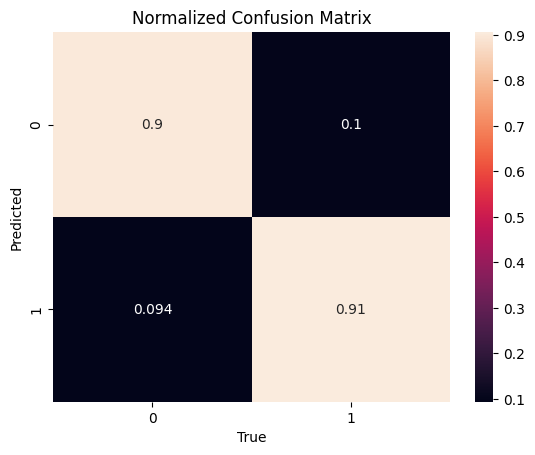

In [106]:
f = sns.heatmap(normalized_confusion_matrix, annot = True)
f.set(title = 'Normalized Confusion Matrix', xlabel = 'True', ylabel = 'Predicted')
plt.savefig("../plots/haley_heatmap_submission3.png")

# run

<h2>Make Prediction</h2>

In [106]:
pred_data = tf.keras.utils.image_dataset_from_directory("../images_test", image_size = (256, 256), labels = None)
pred_data = pred_data.unbatch()
pred_images = [img / 255.0 for img in pred_data]

Found 149 files belonging to 1 classes.


In [107]:
imgs = []
ids = []

for f in os.listdir("../images_test"):
    img = tf.keras.utils.load_img(os.path.join("../images_test", f), target_size = (256, 256, 3))
    # img = tf.keras.utils.img_to_array(img) / 255.0
    id = f.split(".")[0]
    ids.append(id)
    imgs.append(img)

# run

In [108]:
predictions = model.predict(np.array(np.array(imgs)))

# run

5/5 [==============================] - 1s 210ms/step


In [21]:
pred_data = tf.keras.utils.image_dataset_from_directory("../images_test", image_size = (256, 256), labels = None)
#pred_data = pred_data.unbatch()

Found 149 files belonging to 1 classes.


In [22]:
pred_data

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

In [23]:
predictions = model.predict(pred_data)

5/5 [==============================] - 3s 178ms/step


<h2>Format predictions for submission</h2>

In [109]:
class_predictions = np.where(predictions > 0.5, 1, 0).flatten()

# run

In [110]:
df = pd.DataFrame({'id': ids, 'class': class_predictions})
# run

In [111]:
df.to_csv("../submit_9.csv", index = None)
# run

In [112]:
df

,id,class
0,162,0
1,228,0
2,214,0
3,200,1
4,201,1
...,...,...
144,219,1
145,225,0
146,231,1
147,153,0


In [453]:
w = np.matrix()

TypeError: matrix.__new__() missing 1 required positional argument: 'data'

In [456]:
w = np.array([])

In [489]:
w = np.empty((0, 0))

In [491]:
t = np.append(w, [[(0, 1)], [(1, 2)]])

In [494]:
b = [[1, 2], [2, 1]]

In [501]:
np.empty((0, 0))

array([], shape=(0, 0), dtype=float64)

In [511]:
a = np.array([[None, None], [None, None]])

In [507]:
a[0] = 2

In [512]:
a.shape

(2, 2)